<a href="https://colab.research.google.com/github/light3w3/ml_final/blob/main/show_dataset_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# 1. 필수 라이브러리 설치
!pip install librosa matplotlib seaborn --quiet

In [19]:
!pip install umap-learn --quiet

In [6]:
# 2. 라이브러리 임포트
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
test_audio_path = '/content/drive/MyDrive/2501ml_data/test'
test_label_path = '/content/drive/MyDrive/2501ml_data/label/test_label.txt'
train_label_path = '/content/drive/MyDrive/2501ml_data/label/train_label.txt'
train_audio_path = '/content/drive/MyDrive/2501ml_data/train'

In [13]:
with open(test_label_path, 'r') as f:
  lines = f.readlines()

In [14]:
data = []
for line in lines:
    parts = line.strip().split()
    if len(parts) >= 5:
        speaker_id = parts[0]  # 예: KSI
        filename = parts[1]  # 예: KDF_E_0166.wav
        label = parts[-1]    # 예: Real or Fake
        data.append((filename, label,speaker_id))
df = pd.DataFrame(data, columns=['filename', 'label', 'speaker_id'])
df.head()

,filename,label,speaker_id
0,KDF_E_1004.wav,Real,YSG
1,KDF_E_0510.wav,Real,YSG
2,KDF_E_1538.wav,Real,YSG
3,KDF_E_0370.wav,Real,YSG
4,KDF_E_1048.wav,Real,YSG


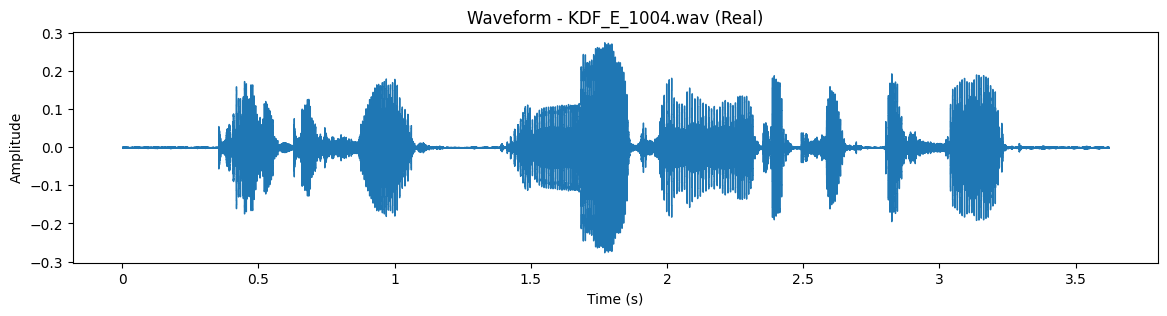

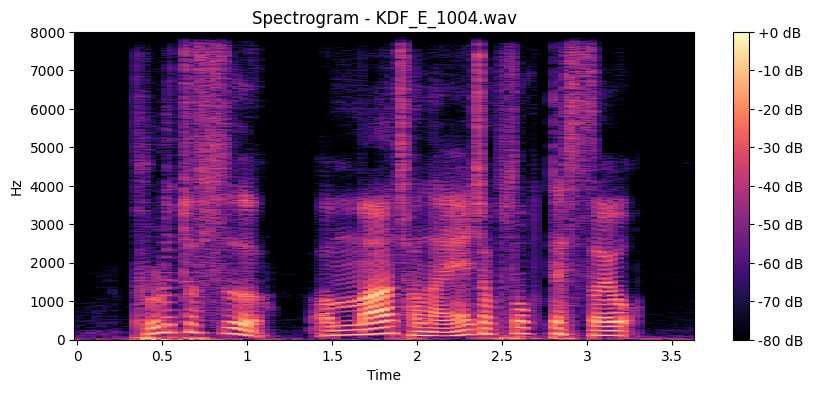

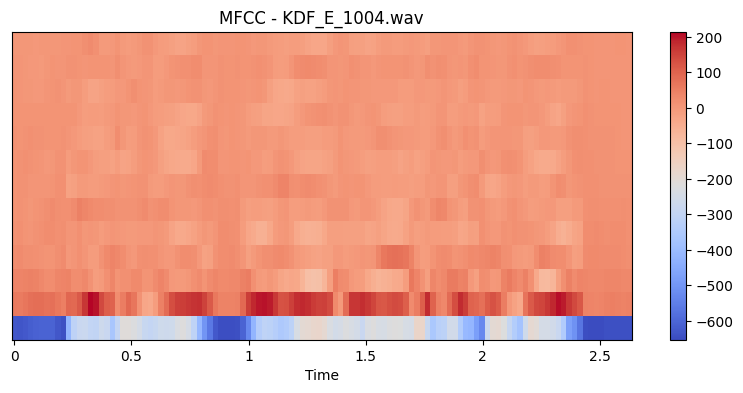

In [16]:
# 시각화할 예제 선택
sample = df.iloc[0]
filename = sample['filename']
file_path = os.path.join(test_audio_path, filename)

# 오디오 로드
y, sr = librosa.load(file_path, sr=16000)

# 🔹 오디오 파일 로드 (librosa를 이용해 16kHz로 로드)
y, sr = librosa.load(file_path, sr=16000)  # y: 오디오 신호(1D), sr: 샘플링레이트

# 🔸 1. Waveform(파형) 시각화
plt.figure(figsize=(14, 3))  # 그래프 크기 설정
librosa.display.waveshow(y, sr=sr)  # 시간축으로 파형 시각화
plt.title(f"Waveform - {filename} ({sample['label']})")  # 제목에 라벨 포함
plt.xlabel("Time (s)")  # X축: 시간
plt.ylabel("Amplitude")  # Y축: 진폭
plt.show()

# 🔸 2. Spectrogram(스펙트로그램) 시각화
plt.figure(figsize=(10, 4))  # 그래프 크기 설정
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)  # STFT 후 dB scale로 변환
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz')  # 시간-주파수 그래프
plt.colorbar(format="%+2.0f dB")  # 색상바: 데시벨 값
plt.title(f"Spectrogram - {filename}")  # 그래프 제목
plt.show()

# 🔸 3. MFCC(Mel Frequency Cepstral Coefficients) 시각화
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # MFCC 13차원 특징 추출
plt.figure(figsize=(10, 4))  # 그래프 크기 설정
librosa.display.specshow(mfccs, x_axis='time')  # 시간-계수 그래프
plt.colorbar()  # 색상바: 계수 값
plt.title(f"MFCC - {filename}")  # 그래프 제목
plt.show()


100%|██████████| 2000/2000 [13:04<00:00,  2.55it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


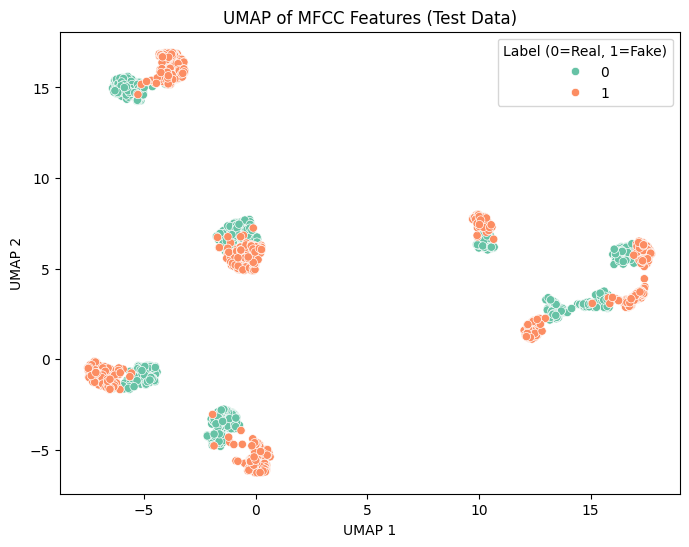

In [20]:
# test 데이터 확인..?
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

mfcc_list = []  # MFCC 특징 저장 리스트
labels = []     # 라벨 (0: Real, 1: Fake)

# 🔁 df 전체 순회
for _, row in tqdm(df.iterrows(), total=len(df)):
    filename = row['filename']
    label = 0 if row['label'] == 'Real' else 1
    file_path = os.path.join(test_audio_path, filename)

    if not os.path.isfile(file_path):
        print(f"파일 없음: {filename}")
        continue

    try:
        y, sr = librosa.load(file_path, sr=16000)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfcc_mean = np.mean(mfcc, axis=1)
        mfcc_list.append(mfcc_mean)
        labels.append(label)
    except Exception as e:
        print(f"Error processing {filename}: {e}")

# 🔹 표준화
X = StandardScaler().fit_transform(mfcc_list)

# 🔹 UMAP 차원 축소
reducer = umap.UMAP(n_components=2, random_state=42)
X_embedded = reducer.fit_transform(X)

# 🔹 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=labels, palette='Set2')
plt.title("UMAP of MFCC Features (Test Data)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title="Label (0=Real, 1=Fake)")
plt.show()

100%|██████████| 4000/4000 [02:28<00:00, 26.93it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


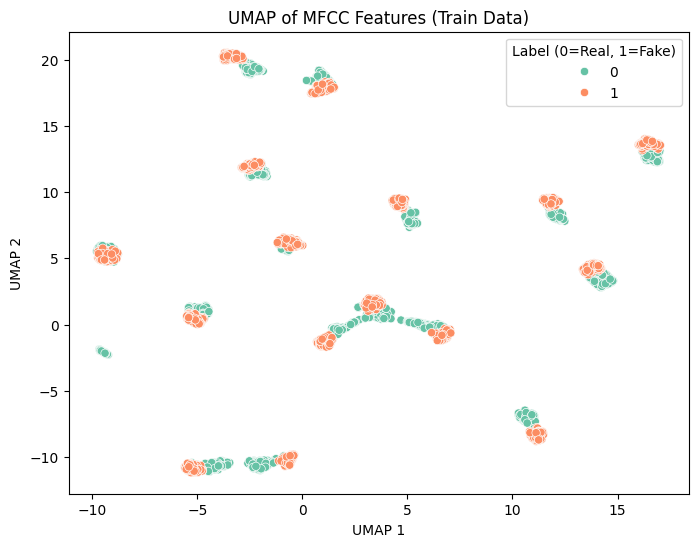

In [22]:
#train 데이터
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

# 🔹 1. train_label.txt 불러오기
with open(train_label_path, 'r') as f:
    lines = f.readlines()

data = []
for line in lines:
    parts = line.strip().split()
    if len(parts) >= 5:
        speaker_id = parts[0]
        filename = parts[1]
        label = parts[-1]
        data.append((filename, label, speaker_id))

df = pd.DataFrame(data, columns=['filename', 'label', 'speaker_id'])

# 🔹 2. MFCC 특징 추출
mfcc_list = []
labels = []

for _, row in tqdm(df.iterrows(), total=len(df)):
    filename = row['filename']
    label = 0 if row['label'] == 'Real' else 1
    file_path = os.path.join(train_audio_path, filename)

    if not os.path.isfile(file_path):
        print(f"파일 없음: {filename}")
        continue

    try:
        y, sr = librosa.load(file_path, sr=16000)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfcc_mean = np.mean(mfcc, axis=1)
        mfcc_list.append(mfcc_mean)
        labels.append(label)
    except Exception as e:
        print(f"Error processing {filename}: {e}")

# 🔹 3. 표준화
X = StandardScaler().fit_transform(mfcc_list)

# 🔹 4. UMAP 차원 축소
reducer = umap.UMAP(n_components=2, random_state=42)
X_embedded = reducer.fit_transform(X)

# 🔹 5. 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=labels, palette='Set2')
plt.title("UMAP of MFCC Features (Train Data)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title="Label (0=Real, 1=Fake)")
plt.show()

In [ ]:
labels

['Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 'Real',
 